# Name: Azizul Kawser
# Student ID: 2207846

1) Write a full graph of 20 nodes where from each node, there is a link to one to six other nodes, taken at random, of your choice.Use a labelling of your choice to label each node of the network.  
a) -  Use a visualization tool to display the graph (OK)      
b) -  Use a visualization of your choice to display the nodes each node is linked to  
c) -  Calculate the degree of each node and the average degree of the graph  (use appropriate functions in NetworkX) and display their values  
d) - Test other centrality measures available in NetworkX and display their values, and store the centrality values in a vector  
e) - write a script that randomly removes one edge from the above graph  
- Repeat the process a)-d)  until the number of edges in the graph is equal to one.  
f) repeat e) .. until the number of edges in the graph is one.  
g ) Display a graph showing the variations of the various centrality measures as a function of the number of 
edges in the graph.

In [1]:
#import required libraries
import networkx as nx
import random
import matplotlib.pyplot as plt

#initialize an empty graph
G = nx.Graph()

# Add 20 nodes with random labels
for i in range(20):
    G.add_node(i, label='Node {}'.format(i))

# Add random edges to each node
for node in G.nodes():
    num_edges = random.randint(1, 6)  # choose random number of edges
    for i in range(num_edges):
        neighbor = random.choice(list(G.nodes()))  # choose random neighbor
        while neighbor == node or G.has_edge(node, neighbor):
            neighbor = random.choice(list(G.nodes()))  # avoid self-loops and duplicates
        G.add_edge(node, neighbor)

In [2]:
G.nodes(data=True)

NodeDataView({0: {'label': 'Node 0'}, 1: {'label': 'Node 1'}, 2: {'label': 'Node 2'}, 3: {'label': 'Node 3'}, 4: {'label': 'Node 4'}, 5: {'label': 'Node 5'}, 6: {'label': 'Node 6'}, 7: {'label': 'Node 7'}, 8: {'label': 'Node 8'}, 9: {'label': 'Node 9'}, 10: {'label': 'Node 10'}, 11: {'label': 'Node 11'}, 12: {'label': 'Node 12'}, 13: {'label': 'Node 13'}, 14: {'label': 'Node 14'}, 15: {'label': 'Node 15'}, 16: {'label': 'Node 16'}, 17: {'label': 'Node 17'}, 18: {'label': 'Node 18'}, 19: {'label': 'Node 19'}})

### Use a visualization tool to display the graph. Use a visualization of your choice to display the nodes each node is linked to

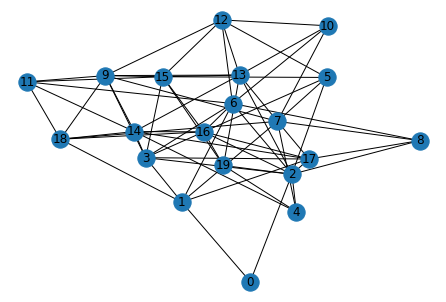

In [3]:
# display the graph
nx.draw(G, with_labels = True)
plt.show()

### Calculate the degree of each node and the average degree of the graph  (use appropriate functions in NetworkX) and display their values

In [4]:
# Calculate the degree of each node
G.degree()

DegreeView({0: 2, 1: 6, 2: 10, 3: 8, 4: 4, 5: 5, 6: 8, 7: 9, 8: 4, 9: 8, 10: 4, 11: 5, 12: 6, 13: 8, 14: 8, 15: 8, 16: 9, 17: 7, 18: 6, 19: 5})

In [5]:
# Calculate the average degree of the graph
avg_degree = nx.average_degree_connectivity(G)
print(avg_degree)

{2: 8.0, 6: 7.0, 10: 6.0, 8: 7.104166666666667, 4: 8.083333333333334, 5: 7.933333333333334, 9: 6.5, 7: 7.714285714285714}


### Test other centrality measures available in NetworkX and display their values, and store the centrality values in a vector

In [6]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)

{0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.5263157894736842, 3: 0.42105263157894735, 4: 0.21052631578947367, 5: 0.2631578947368421, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.21052631578947367, 9: 0.42105263157894735, 10: 0.21052631578947367, 11: 0.2631578947368421, 12: 0.3157894736842105, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.3157894736842105, 19: 0.2631578947368421}


### write a script that randomly removes one edge from the above graph Repeat the process a)-d)  until the number of edges in the graph is equal to one.

In [7]:
# Define a function that randomly removes one edge from the graph
def remove_edge(G):
    """
    removes edges from the graph and then draws the graph and Calculate the degree of each node, 
    average degree of the graph and centrality measures .
    """
    edges = list(G.edges())
    #create random choice of edges
    edge_to_remove = random.choice(edges)
    #remove the edge
    G.remove_edge(*edge_to_remove)
    #display the graph
    nx.draw(G, with_labels = True)
    plt.show()
    # Calculate the degree of each node
    print("The degree of each node is: ",G.degree())
    # Calculate the average degree of the graph
    avg_degree = nx.average_degree_connectivity(G)
    print('The average degree of the graph is ',avg_degree)
    deg_centrality = nx.degree_centrality(G)
    print('The degree of centrality:',deg_centrality)

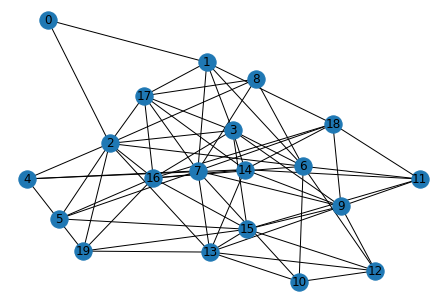

The degree of each node is:  [(0, 2), (1, 6), (2, 10), (3, 8), (4, 4), (5, 4), (6, 8), (7, 9), (8, 4), (9, 8), (10, 4), (11, 5), (12, 5), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 6), (19, 5)]
The average degree of the graph is  {2: 8.0, 6: 7.083333333333333, 10: 5.9, 8: 7.0, 4: 8.25, 9: 6.388888888888889, 5: 7.533333333333333, 7: 7.714285714285714}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.5263157894736842, 3: 0.42105263157894735, 4: 0.21052631578947367, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.21052631578947367, 9: 0.42105263157894735, 10: 0.21052631578947367, 11: 0.2631578947368421, 12: 0.2631578947368421, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.3157894736842105, 19: 0.2631578947368421}


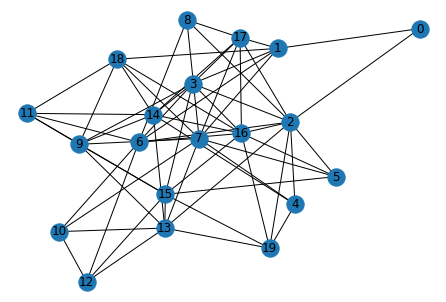

The degree of each node is:  [(0, 2), (1, 6), (2, 10), (3, 8), (4, 4), (5, 4), (6, 8), (7, 9), (8, 4), (9, 7), (10, 4), (11, 5), (12, 4), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 6), (19, 5)]
The average degree of the graph is  {2: 8.0, 6: 7.0, 10: 5.9, 8: 6.8, 4: 7.95, 9: 6.333333333333333, 7: 7.571428571428571, 5: 7.6}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.5263157894736842, 3: 0.42105263157894735, 4: 0.21052631578947367, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.21052631578947367, 9: 0.3684210526315789, 10: 0.21052631578947367, 11: 0.2631578947368421, 12: 0.21052631578947367, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.3157894736842105, 19: 0.2631578947368421}


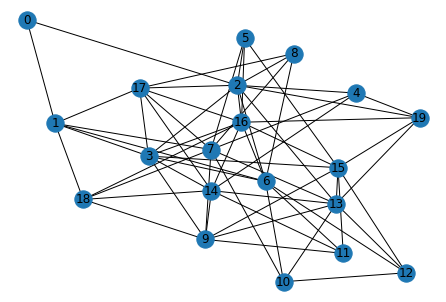

The degree of each node is:  [(0, 2), (1, 6), (2, 10), (3, 8), (4, 4), (5, 4), (6, 8), (7, 9), (8, 4), (9, 7), (10, 4), (11, 4), (12, 4), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 5)]
The average degree of the graph is  {2: 8.0, 6: 6.5, 10: 5.9, 8: 6.7, 4: 7.916666666666667, 9: 6.222222222222222, 7: 7.428571428571429, 5: 7.8}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.5263157894736842, 3: 0.42105263157894735, 4: 0.21052631578947367, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.21052631578947367, 9: 0.3684210526315789, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.21052631578947367, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.2631578947368421}


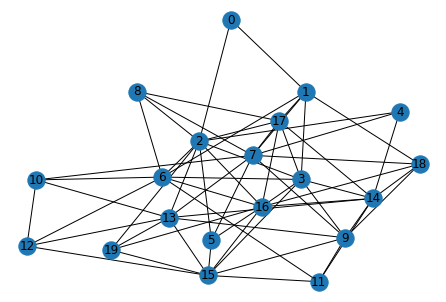

The degree of each node is:  [(0, 2), (1, 6), (2, 10), (3, 8), (4, 3), (5, 4), (6, 8), (7, 9), (8, 4), (9, 7), (10, 4), (11, 4), (12, 4), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 8.0, 6: 6.5, 10: 5.7, 8: 6.625, 3: 9.0, 4: 8.041666666666666, 9: 6.111111111111111, 7: 7.428571428571429, 5: 7.8}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.5263157894736842, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.21052631578947367, 9: 0.3684210526315789, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.21052631578947367, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


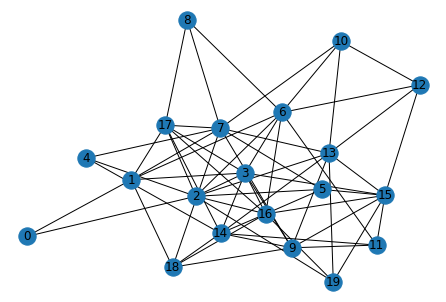

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 4), (6, 8), (7, 9), (8, 3), (9, 7), (10, 4), (11, 4), (12, 4), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.5, 6: 6.5, 9: 5.962962962962963, 8: 6.525, 3: 8.333333333333334, 4: 7.85, 7: 7.285714285714286, 5: 7.8}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.47368421052631576, 8: 0.15789473684210525, 9: 0.3684210526315789, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.21052631578947367, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


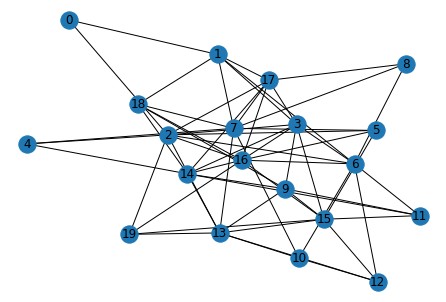

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 4), (6, 8), (7, 8), (8, 3), (9, 6), (10, 4), (11, 4), (12, 4), (13, 8), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.5, 6: 6.583333333333333, 9: 6.333333333333333, 8: 6.166666666666667, 3: 8.0, 4: 7.7, 7: 7.285714285714286, 5: 7.4}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.42105263157894735, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.21052631578947367, 13: 0.42105263157894735, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


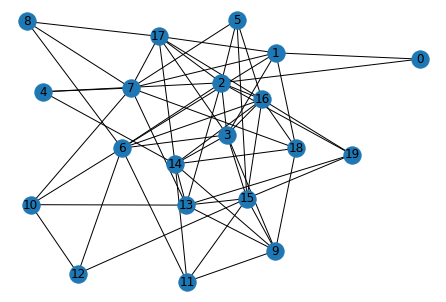

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 4), (6, 8), (7, 8), (8, 3), (9, 6), (10, 4), (11, 4), (12, 3), (13, 7), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.5, 6: 6.5, 9: 6.277777777777778, 8: 6.0, 3: 7.555555555555555, 4: 7.6875, 7: 7.0, 5: 7.4}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.42105263157894735, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3684210526315789, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


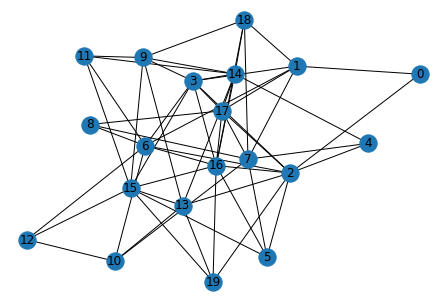

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 4), (6, 8), (7, 7), (8, 3), (9, 6), (10, 4), (11, 4), (12, 3), (13, 6), (14, 8), (15, 8), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.5, 6: 6.388888888888889, 9: 6.222222222222222, 8: 6.21875, 3: 7.333333333333333, 4: 7.4375, 7: 5.857142857142857, 5: 7.2}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.21052631578947367, 6: 0.42105263157894735, 7: 0.3684210526315789, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3157894736842105, 14: 0.42105263157894735, 15: 0.42105263157894735, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


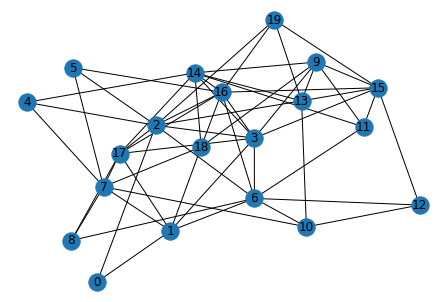

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 3), (6, 8), (7, 7), (8, 3), (9, 6), (10, 4), (11, 4), (12, 3), (13, 6), (14, 8), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.5, 6: 6.277777777777778, 9: 6.055555555555555, 8: 6.416666666666667, 3: 7.5, 7: 5.761904761904762, 4: 7.0, 5: 7.2}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.15789473684210525, 6: 0.42105263157894735, 7: 0.3684210526315789, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3157894736842105, 14: 0.42105263157894735, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


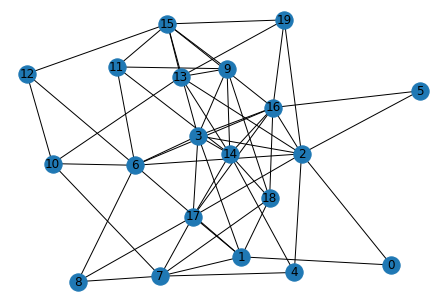

The degree of each node is:  [(0, 2), (1, 6), (2, 9), (3, 8), (4, 3), (5, 2), (6, 8), (7, 6), (8, 3), (9, 6), (10, 4), (11, 4), (12, 3), (13, 6), (14, 8), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 8.25, 6: 5.833333333333333, 9: 5.944444444444445, 8: 6.416666666666667, 3: 7.0, 4: 6.916666666666667, 7: 6.357142857142857, 5: 7.0}
The degree of centrality: {0: 0.10526315789473684, 1: 0.3157894736842105, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.42105263157894735, 7: 0.3157894736842105, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3157894736842105, 14: 0.42105263157894735, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


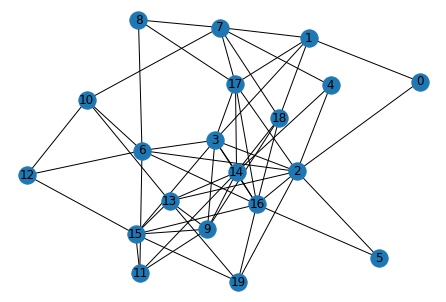

The degree of each node is:  [(0, 2), (1, 5), (2, 9), (3, 8), (4, 3), (5, 2), (6, 7), (7, 6), (8, 3), (9, 6), (10, 4), (11, 4), (12, 3), (13, 6), (14, 8), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 8.0, 5: 6.2, 9: 5.833333333333333, 8: 6.625, 3: 6.777777777777778, 7: 6.095238095238095, 6: 5.722222222222222, 4: 6.75}
The degree of centrality: {0: 0.10526315789473684, 1: 0.2631578947368421, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.3684210526315789, 7: 0.3157894736842105, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.21052631578947367, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3157894736842105, 14: 0.42105263157894735, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


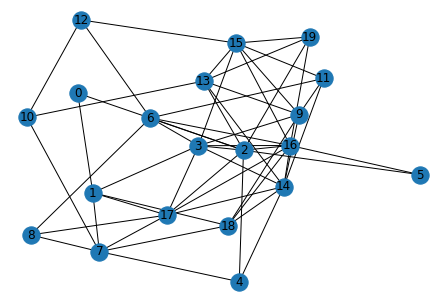

The degree of each node is:  [(0, 2), (1, 5), (2, 9), (3, 8), (4, 3), (5, 2), (6, 6), (7, 6), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 6), (14, 8), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 8.0, 5: 6.2, 9: 5.722222222222222, 8: 6.5625, 3: 6.083333333333333, 6: 5.708333333333333, 4: 7.25, 7: 6.285714285714286}
The degree of centrality: {0: 0.10526315789473684, 1: 0.2631578947368421, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.3157894736842105, 7: 0.3157894736842105, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.3157894736842105, 14: 0.42105263157894735, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


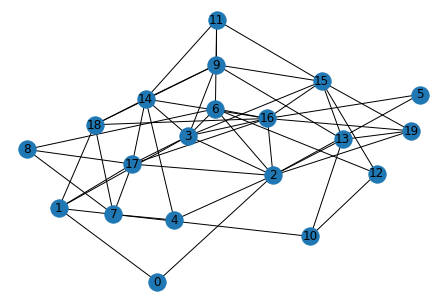

The degree of each node is:  [(0, 2), (1, 5), (2, 9), (3, 8), (4, 3), (5, 2), (6, 6), (7, 6), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 8.0, 5: 6.0, 9: 5.611111111111111, 8: 7.0, 3: 5.916666666666667, 6: 5.444444444444445, 4: 7.0, 7: 6.095238095238095}
The degree of centrality: {0: 0.10526315789473684, 1: 0.2631578947368421, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.3157894736842105, 7: 0.3157894736842105, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


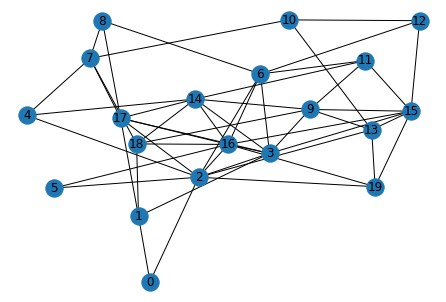

The degree of each node is:  [(0, 2), (1, 4), (2, 9), (3, 8), (4, 3), (5, 2), (6, 6), (7, 5), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.75, 4: 6.5, 9: 5.611111111111111, 8: 6.875, 3: 5.666666666666667, 6: 6.0, 5: 5.4, 7: 6.0}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.47368421052631576, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.3157894736842105, 7: 0.2631578947368421, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


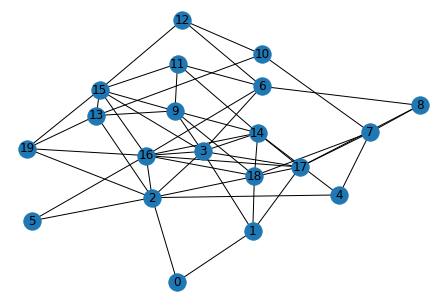

The degree of each node is:  [(0, 2), (1, 4), (2, 8), (3, 8), (4, 3), (5, 2), (6, 5), (7, 5), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 7), (18, 5), (19, 4)]
The average degree of the graph is  {2: 7.25, 4: 6.333333333333333, 8: 5.8125, 3: 5.416666666666667, 5: 5.35, 6: 6.0, 7: 5.9523809523809526, 9: 5.888888888888889}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.42105263157894735, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.2631578947368421, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.2631578947368421, 19: 0.21052631578947367}


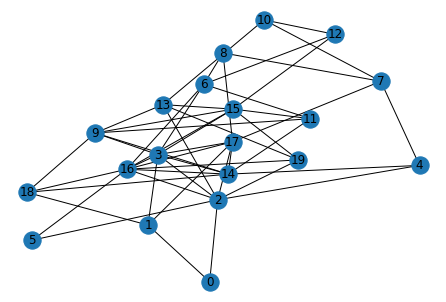

The degree of each node is:  [(0, 2), (1, 4), (2, 8), (3, 8), (4, 3), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 7), (18, 4), (19, 4)]
The average degree of the graph is  {2: 7.25, 4: 5.85, 8: 5.8125, 3: 5.166666666666667, 5: 5.5, 6: 5.833333333333333, 7: 5.857142857142857, 9: 5.777777777777778}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.42105263157894735, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3684210526315789, 18: 0.21052631578947367, 19: 0.21052631578947367}


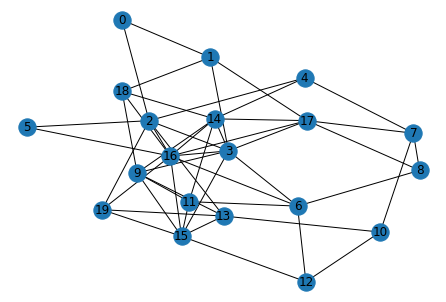

The degree of each node is:  [(0, 2), (1, 4), (2, 7), (3, 8), (4, 3), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 6), (18, 4), (19, 4)]
The average degree of the graph is  {2: 6.75, 4: 5.7, 7: 5.333333333333333, 8: 6.375, 3: 5.0, 5: 5.4, 6: 5.833333333333333, 9: 5.555555555555555}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.3684210526315789, 3: 0.42105263157894735, 4: 0.15789473684210525, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3157894736842105, 18: 0.21052631578947367, 19: 0.21052631578947367}


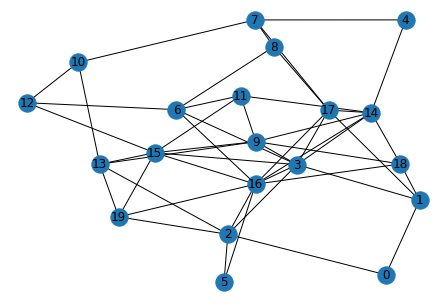

The degree of each node is:  [(0, 2), (1, 4), (2, 6), (3, 8), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 6), (18, 4), (19, 4)]
The average degree of the graph is  {2: 6.0, 4: 5.6, 6: 5.555555555555555, 8: 6.25, 5: 5.3, 3: 4.666666666666667, 7: 5.571428571428571, 9: 5.444444444444445}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.3157894736842105, 3: 0.42105263157894735, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.3157894736842105, 18: 0.21052631578947367, 19: 0.21052631578947367}


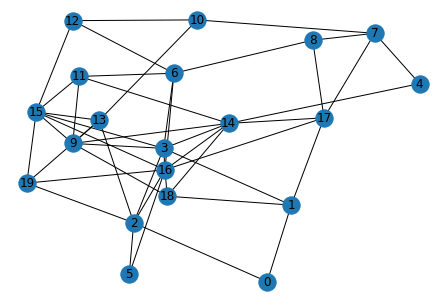

The degree of each node is:  [(0, 2), (1, 4), (2, 6), (3, 7), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 9), (17, 5), (18, 4), (19, 4)]
The average degree of the graph is  {2: 6.0, 4: 5.45, 6: 5.25, 7: 5.666666666666667, 5: 5.266666666666667, 3: 4.555555555555555, 9: 5.222222222222222}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.3157894736842105, 3: 0.3684210526315789, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.47368421052631576, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.21052631578947367}


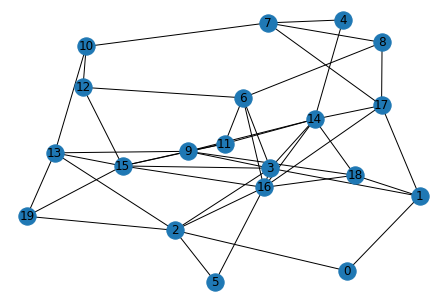

The degree of each node is:  [(0, 2), (1, 4), (2, 6), (3, 7), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 8), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {2: 5.833333333333333, 4: 5.0625, 6: 5.083333333333333, 7: 5.476190476190476, 5: 5.066666666666666, 3: 4.916666666666667, 8: 5.375}
The degree of centrality: {0: 0.10526315789473684, 1: 0.21052631578947367, 2: 0.3157894736842105, 3: 0.3684210526315789, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.42105263157894735, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


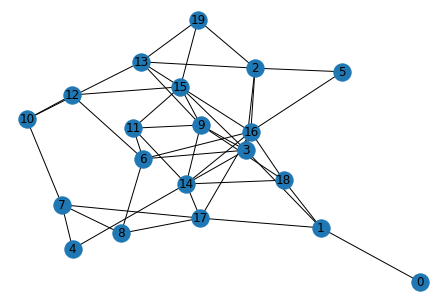

The degree of each node is:  [(0, 1), (1, 4), (2, 5), (3, 7), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 6), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 7), (16, 8), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {1: 4.0, 4: 5.0, 5: 5.0, 7: 5.428571428571429, 2: 6.0, 3: 4.833333333333333, 6: 5.666666666666667, 8: 5.25}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.2631578947368421, 3: 0.3684210526315789, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.3157894736842105, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3684210526315789, 16: 0.42105263157894735, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


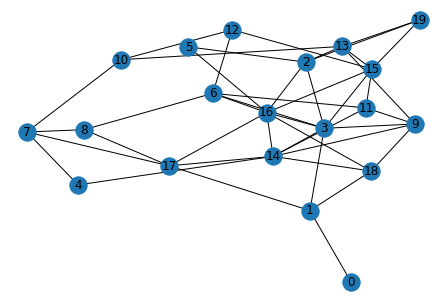

The degree of each node is:  [(0, 1), (1, 4), (2, 5), (3, 7), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 5), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 6), (16, 8), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {1: 4.0, 4: 4.8125, 5: 5.0, 7: 5.357142857142857, 2: 6.0, 3: 4.666666666666667, 6: 5.0, 8: 5.125}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.2631578947368421, 3: 0.3684210526315789, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.2631578947368421, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3157894736842105, 16: 0.42105263157894735, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


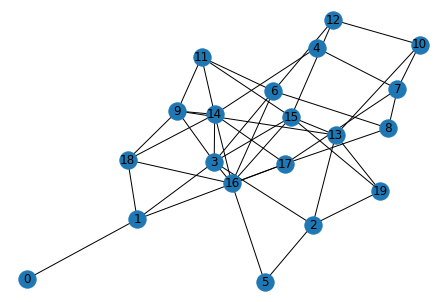

The degree of each node is:  [(0, 1), (1, 4), (2, 4), (3, 7), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 5), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 6), (16, 7), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {1: 4.0, 4: 4.65, 7: 5.142857142857143, 2: 5.5, 5: 4.85, 3: 4.583333333333333, 6: 4.833333333333333}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.21052631578947367, 3: 0.3684210526315789, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.2631578947368421, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


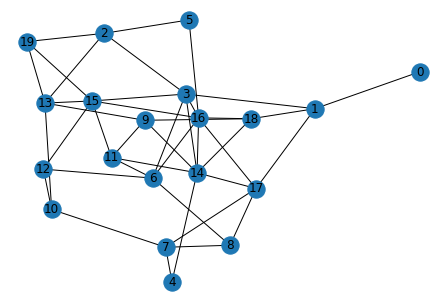

The degree of each node is:  [(0, 1), (1, 4), (2, 4), (3, 6), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 5), (14, 7), (15, 6), (16, 7), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {1: 4.0, 4: 4.541666666666667, 6: 5.083333333333333, 2: 5.5, 5: 4.533333333333333, 3: 4.583333333333333, 7: 4.785714285714286}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.21052631578947367, 3: 0.3157894736842105, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.2631578947368421, 14: 0.3684210526315789, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


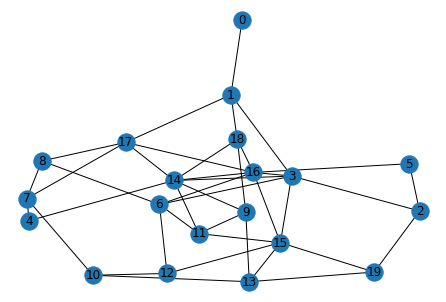

The degree of each node is:  [(0, 1), (1, 4), (2, 3), (3, 6), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 4), (14, 7), (15, 6), (16, 7), (17, 5), (18, 4), (19, 3)]
The average degree of the graph is  {1: 4.0, 4: 4.5, 3: 4.2, 6: 4.916666666666667, 2: 5.25, 5: 4.8, 7: 4.785714285714286}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.15789473684210525, 3: 0.3157894736842105, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3684210526315789, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.15789473684210525}


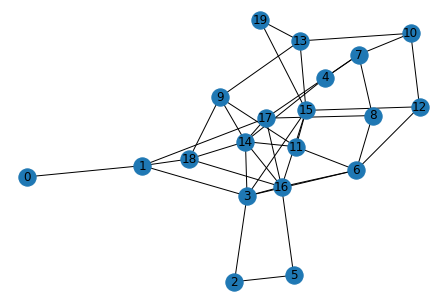

The degree of each node is:  [(0, 1), (1, 4), (2, 2), (3, 6), (4, 2), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 4), (14, 7), (15, 6), (16, 7), (17, 5), (18, 4), (19, 2)]
The average degree of the graph is  {1: 4.0, 4: 4.458333333333333, 2: 4.75, 6: 4.75, 5: 4.8, 3: 4.333333333333333, 7: 4.785714285714286}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.10526315789473684, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3684210526315789, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.10526315789473684}


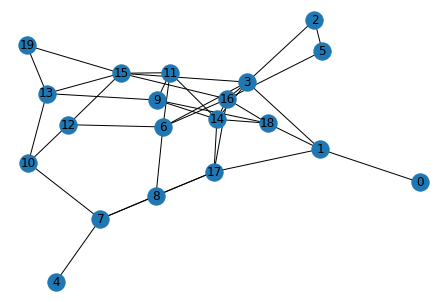

The degree of each node is:  [(0, 1), (1, 4), (2, 2), (3, 6), (4, 1), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 4), (14, 6), (15, 6), (16, 7), (17, 5), (18, 4), (19, 2)]
The average degree of the graph is  {1: 4.0, 4: 4.291666666666667, 2: 4.5, 6: 4.777777777777778, 5: 4.7, 3: 4.333333333333333, 7: 4.857142857142857}
The degree of centrality: {0: 0.05263157894736842, 1: 0.21052631578947367, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3157894736842105, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.21052631578947367, 19: 0.10526315789473684}


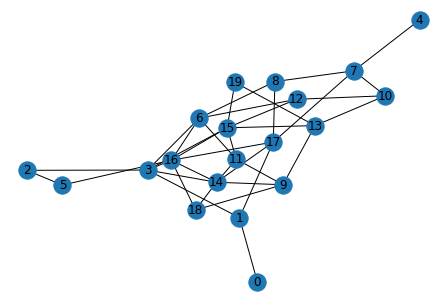

The degree of each node is:  [(0, 1), (1, 3), (2, 2), (3, 6), (4, 1), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 4), (14, 6), (15, 6), (16, 7), (17, 5), (18, 3), (19, 2)]
The average degree of the graph is  {1: 3.5, 3: 4.533333333333333, 2: 4.5, 6: 4.666666666666667, 5: 4.6, 4: 4.0625, 7: 4.714285714285714}
The degree of centrality: {0: 0.05263157894736842, 1: 0.15789473684210525, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3157894736842105, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.10526315789473684}


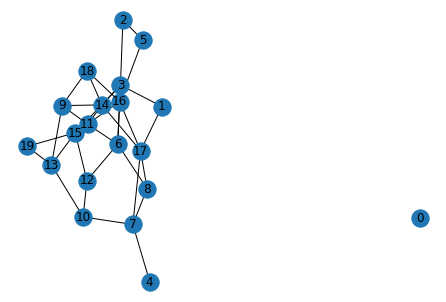

The degree of each node is:  [(0, 0), (1, 2), (2, 2), (3, 6), (4, 1), (5, 2), (6, 5), (7, 4), (8, 3), (9, 4), (10, 3), (11, 4), (12, 3), (13, 4), (14, 6), (15, 6), (16, 7), (17, 5), (18, 3), (19, 2)]
The average degree of the graph is  {0: 0, 2: 4.75, 6: 4.611111111111111, 1: 4.0, 5: 4.5, 4: 4.0625, 3: 4.666666666666667, 7: 4.714285714285714}
The degree of centrality: {0: 0.0, 1: 0.10526315789473684, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.2631578947368421, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.21052631578947367, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3157894736842105, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.10526315789473684}


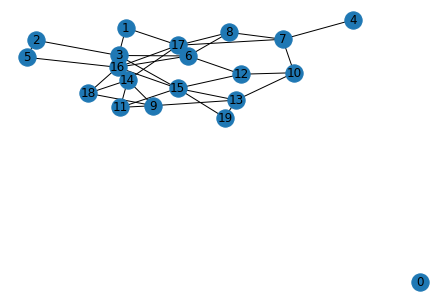

The degree of each node is:  [(0, 0), (1, 2), (2, 2), (3, 6), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 3), (11, 3), (12, 3), (13, 4), (14, 6), (15, 6), (16, 7), (17, 5), (18, 3), (19, 2)]
The average degree of the graph is  {0: 0, 2: 4.75, 6: 4.444444444444445, 1: 4.0, 4: 3.875, 3: 4.666666666666667, 7: 4.571428571428571, 5: 4.4}
The degree of centrality: {0: 0.0, 1: 0.10526315789473684, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.15789473684210525, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.3157894736842105, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.10526315789473684}


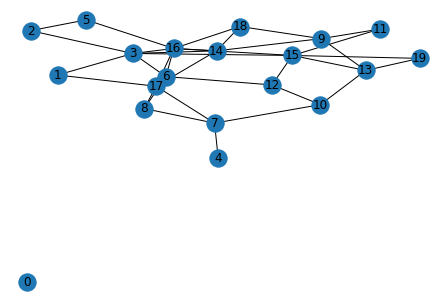

The degree of each node is:  [(0, 0), (1, 2), (2, 2), (3, 6), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 3), (11, 2), (12, 3), (13, 4), (14, 5), (15, 6), (16, 7), (17, 5), (18, 3), (19, 2)]
The average degree of the graph is  {0: 0, 2: 4.8, 6: 4.166666666666667, 1: 4.0, 4: 3.75, 3: 4.416666666666667, 5: 4.6, 7: 4.428571428571429}
The degree of centrality: {0: 0.0, 1: 0.10526315789473684, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.10526315789473684, 12: 0.15789473684210525, 13: 0.21052631578947367, 14: 0.2631578947368421, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.10526315789473684}


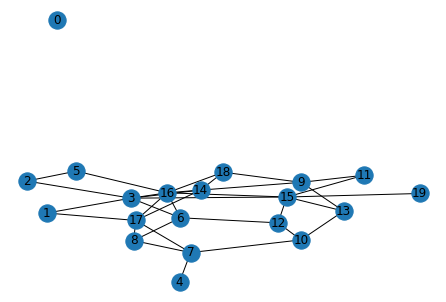

The degree of each node is:  [(0, 0), (1, 2), (2, 2), (3, 6), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 3), (11, 2), (12, 3), (13, 3), (14, 5), (15, 6), (16, 7), (17, 5), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 2: 4.75, 6: 4.0, 1: 5.0, 4: 3.6666666666666665, 3: 4.333333333333333, 5: 4.6, 7: 4.428571428571429}
The degree of centrality: {0: 0.0, 1: 0.10526315789473684, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.15789473684210525, 11: 0.10526315789473684, 12: 0.15789473684210525, 13: 0.15789473684210525, 14: 0.2631578947368421, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.05263157894736842}


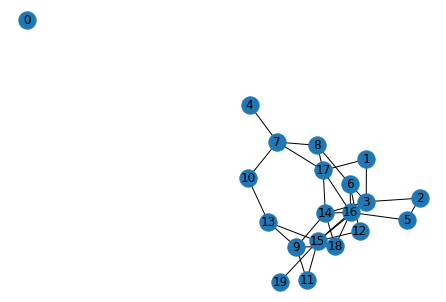

The degree of each node is:  [(0, 0), (1, 2), (2, 2), (3, 6), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 2), (13, 3), (14, 5), (15, 6), (16, 7), (17, 5), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 2: 4.583333333333333, 6: 3.9166666666666665, 1: 5.0, 4: 3.5, 3: 4.555555555555555, 5: 4.6, 7: 4.428571428571429}
The degree of centrality: {0: 0.0, 1: 0.10526315789473684, 2: 0.10526315789473684, 3: 0.3157894736842105, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.10526315789473684, 13: 0.15789473684210525, 14: 0.2631578947368421, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.05263157894736842}


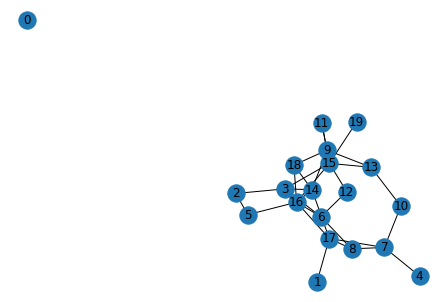

The degree of each node is:  [(0, 0), (1, 1), (2, 2), (3, 5), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 2), (13, 3), (14, 5), (15, 6), (16, 7), (17, 5), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 5.0, 2: 4.3, 5: 4.533333333333333, 4: 3.4166666666666665, 3: 4.555555555555555, 6: 3.3333333333333335, 7: 4.285714285714286}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.10526315789473684, 3: 0.2631578947368421, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.10526315789473684, 13: 0.15789473684210525, 14: 0.2631578947368421, 15: 0.3157894736842105, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.05263157894736842}


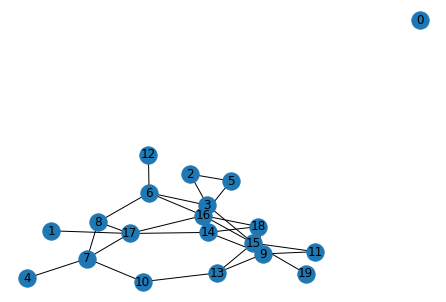

The degree of each node is:  [(0, 0), (1, 1), (2, 2), (3, 5), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 1), (13, 3), (14, 5), (15, 5), (16, 7), (17, 5), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 4.5, 2: 4.0, 5: 4.25, 4: 3.3333333333333335, 3: 4.444444444444445, 7: 4.142857142857143}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.10526315789473684, 3: 0.2631578947368421, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.15789473684210525, 14: 0.2631578947368421, 15: 0.2631578947368421, 16: 0.3684210526315789, 17: 0.2631578947368421, 18: 0.15789473684210525, 19: 0.05263157894736842}


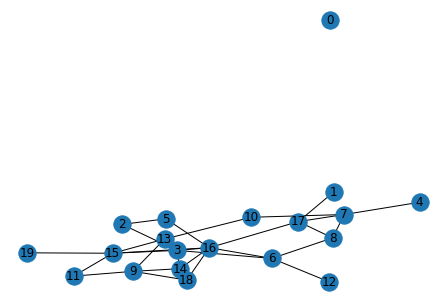

The degree of each node is:  [(0, 0), (1, 1), (2, 2), (3, 5), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 1), (13, 3), (14, 4), (15, 5), (16, 7), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 4.25, 2: 4.0, 5: 4.0, 4: 3.6, 3: 4.222222222222222, 7: 3.857142857142857}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.10526315789473684, 3: 0.2631578947368421, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.15789473684210525, 14: 0.21052631578947367, 15: 0.2631578947368421, 16: 0.3684210526315789, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


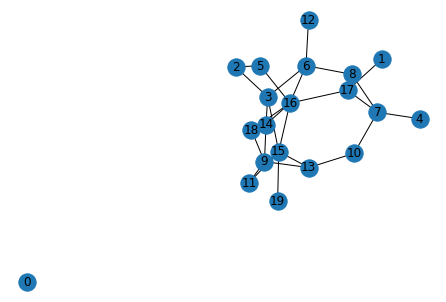

The degree of each node is:  [(0, 0), (1, 1), (2, 2), (3, 4), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 1), (13, 3), (14, 4), (15, 5), (16, 6), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 4.25, 2: 3.75, 4: 3.4166666666666665, 3: 4.111111111111111, 5: 3.2, 6: 3.6666666666666665}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.10526315789473684, 3: 0.21052631578947367, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.15789473684210525, 14: 0.21052631578947367, 15: 0.2631578947368421, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


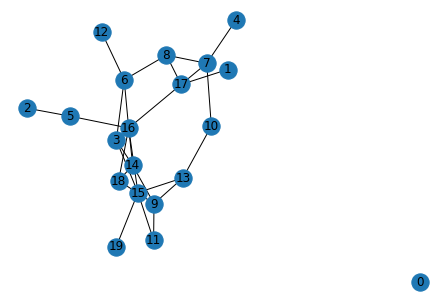

The degree of each node is:  [(0, 0), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 1), (13, 3), (14, 4), (15, 5), (16, 6), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 3.8, 3: 4.166666666666667, 2: 3.8333333333333335, 4: 3.25, 5: 3.0, 6: 3.6666666666666665}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.05263157894736842, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.15789473684210525, 14: 0.21052631578947367, 15: 0.2631578947368421, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


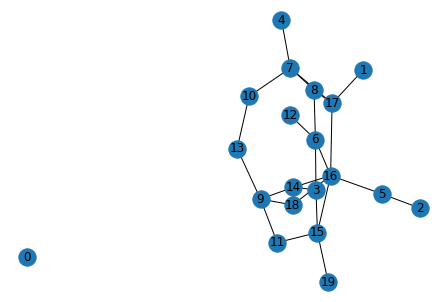

The degree of each node is:  [(0, 0), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 4), (10, 2), (11, 2), (12, 1), (13, 2), (14, 4), (15, 4), (16, 6), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 3.6, 3: 4.222222222222222, 2: 3.375, 4: 3.1666666666666665, 6: 3.5}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.05263157894736842, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.21052631578947367, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.21052631578947367, 15: 0.21052631578947367, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


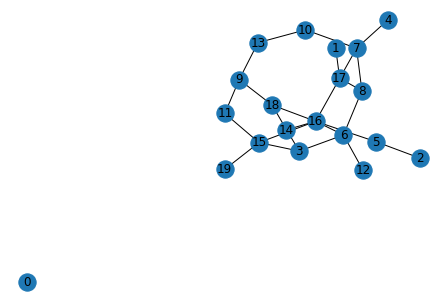

The degree of each node is:  [(0, 0), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 3), (10, 2), (11, 2), (12, 1), (13, 2), (14, 3), (15, 4), (16, 6), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 3.6, 3: 3.6, 2: 3.125, 4: 3.0625, 6: 3.3333333333333335}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.05263157894736842, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.15789473684210525, 10: 0.10526315789473684, 11: 0.10526315789473684, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.15789473684210525, 15: 0.21052631578947367, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


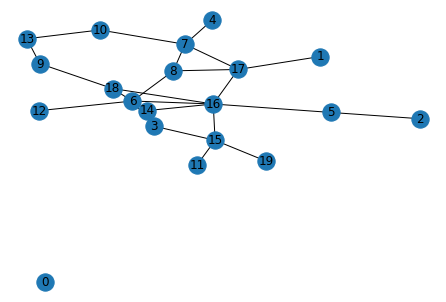

The degree of each node is:  [(0, 0), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 3), (15, 4), (16, 6), (17, 4), (18, 3), (19, 1)]
The average degree of the graph is  {0: 0, 1: 3.6666666666666665, 3: 3.8333333333333335, 2: 2.75, 4: 3.0, 6: 3.3333333333333335}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.05263157894736842, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.15789473684210525, 15: 0.21052631578947367, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.05263157894736842}


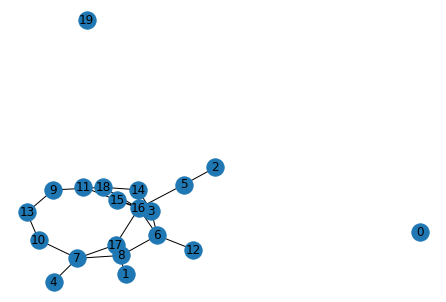

The degree of each node is:  [(0, 0), (1, 1), (2, 1), (3, 3), (4, 1), (5, 2), (6, 4), (7, 4), (8, 3), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 3), (15, 3), (16, 6), (17, 4), (18, 3), (19, 0)]
The average degree of the graph is  {0: 0, 1: 3.4, 3: 3.6666666666666665, 2: 2.75, 4: 3.0833333333333335, 6: 3.1666666666666665}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.05263157894736842, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.10526315789473684, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.15789473684210525, 15: 0.15789473684210525, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.0}


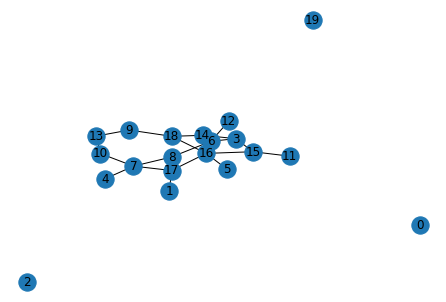

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 3), (4, 1), (5, 1), (6, 4), (7, 4), (8, 3), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 3), (15, 3), (16, 6), (17, 4), (18, 3), (19, 0)]
The average degree of the graph is  {0: 0, 1: 4.2, 3: 3.6666666666666665, 4: 3.0833333333333335, 2: 2.5, 6: 3.0}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.05263157894736842, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.15789473684210525, 15: 0.15789473684210525, 16: 0.3157894736842105, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.0}


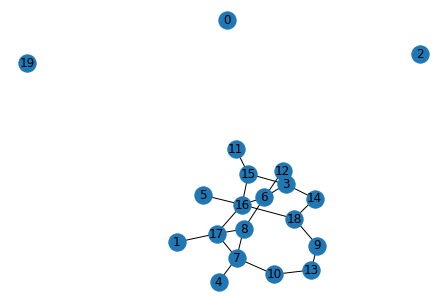

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 3), (4, 1), (5, 1), (6, 4), (7, 4), (8, 3), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 2), (15, 3), (16, 5), (17, 4), (18, 3), (19, 0)]
The average degree of the graph is  {0: 0, 1: 4.0, 3: 3.25, 4: 2.9166666666666665, 2: 2.625, 5: 3.0}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.05263157894736842, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.15789473684210525, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.10526315789473684, 15: 0.15789473684210525, 16: 0.2631578947368421, 17: 0.21052631578947367, 18: 0.15789473684210525, 19: 0.0}


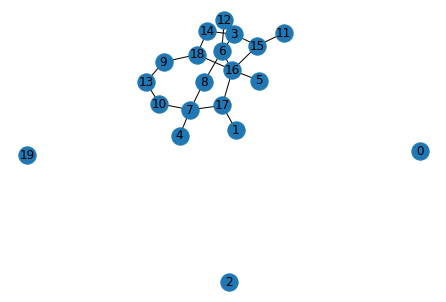

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 3), (4, 1), (5, 1), (6, 4), (7, 4), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 2), (15, 3), (16, 5), (17, 3), (18, 3), (19, 0)]
The average degree of the graph is  {0: 0, 1: 3.8, 3: 3.0833333333333335, 4: 2.375, 2: 2.9, 5: 2.8}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.05263157894736842, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.10526315789473684, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.10526315789473684, 15: 0.15789473684210525, 16: 0.2631578947368421, 17: 0.15789473684210525, 18: 0.15789473684210525, 19: 0.0}


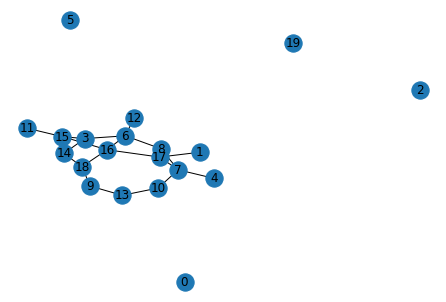

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 3), (4, 1), (5, 0), (6, 4), (7, 4), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 2), (15, 3), (16, 4), (17, 3), (18, 3), (19, 0)]
The average degree of the graph is  {0: 0, 1: 3.5, 3: 2.8333333333333335, 4: 2.5833333333333335, 2: 2.9}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.0, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.10526315789473684, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.10526315789473684, 15: 0.15789473684210525, 16: 0.21052631578947367, 17: 0.15789473684210525, 18: 0.15789473684210525, 19: 0.0}


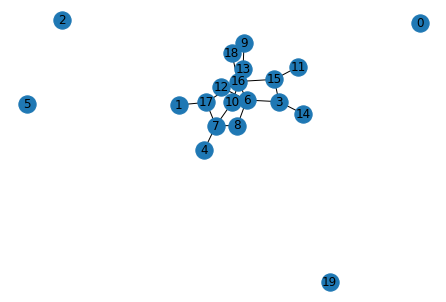

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 3), (4, 1), (5, 0), (6, 4), (7, 4), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 4), (17, 3), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 3.4, 3: 2.7777777777777777, 4: 2.5, 2: 2.8}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.15789473684210525, 4: 0.05263157894736842, 5: 0.0, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.10526315789473684, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.15789473684210525, 16: 0.21052631578947367, 17: 0.15789473684210525, 18: 0.10526315789473684, 19: 0.0}


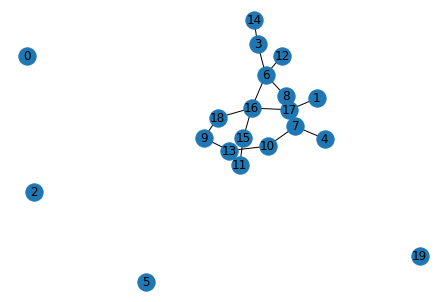

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 2), (4, 1), (5, 0), (6, 4), (7, 4), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 4), (17, 3), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 3.0, 2: 2.7142857142857144, 4: 2.3333333333333335, 3: 3.0}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.10526315789473684, 4: 0.05263157894736842, 5: 0.0, 6: 0.21052631578947367, 7: 0.21052631578947367, 8: 0.10526315789473684, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.21052631578947367, 17: 0.15789473684210525, 18: 0.10526315789473684, 19: 0.0}


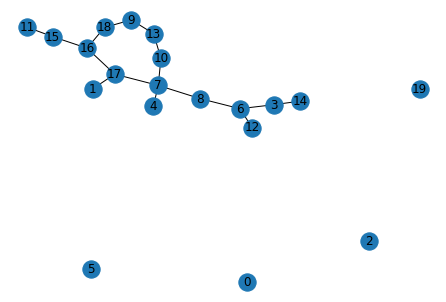

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 2), (4, 1), (5, 0), (6, 3), (7, 4), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 3), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 2.8, 2: 2.4285714285714284, 3: 2.2222222222222223, 4: 2.0}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.10526315789473684, 4: 0.05263157894736842, 5: 0.0, 6: 0.15789473684210525, 7: 0.21052631578947367, 8: 0.10526315789473684, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.15789473684210525, 18: 0.10526315789473684, 19: 0.0}


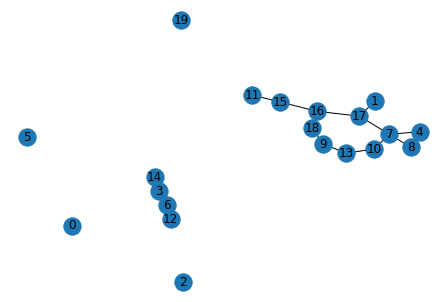

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 2), (4, 1), (5, 0), (6, 2), (7, 4), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 3), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 2.8333333333333335, 2: 2.0714285714285716, 4: 1.75, 3: 2.5}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.10526315789473684, 4: 0.05263157894736842, 5: 0.0, 6: 0.10526315789473684, 7: 0.21052631578947367, 8: 0.05263157894736842, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.15789473684210525, 18: 0.10526315789473684, 19: 0.0}


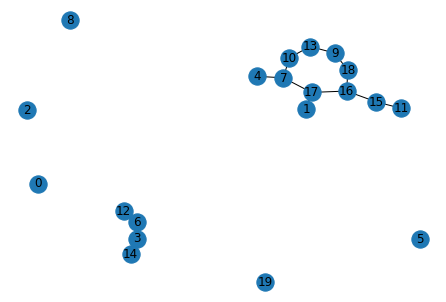

The degree of each node is:  [(0, 0), (1, 1), (2, 0), (3, 2), (4, 1), (5, 0), (6, 2), (7, 3), (8, 0), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 3), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 2.4, 2: 2.0, 3: 2.2222222222222223}
The degree of centrality: {0: 0.0, 1: 0.05263157894736842, 2: 0.0, 3: 0.10526315789473684, 4: 0.05263157894736842, 5: 0.0, 6: 0.10526315789473684, 7: 0.15789473684210525, 8: 0.0, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.15789473684210525, 18: 0.10526315789473684, 19: 0.0}


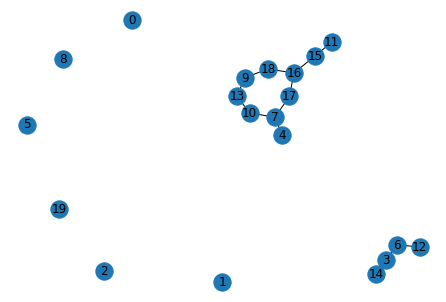

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 2), (4, 1), (5, 0), (6, 2), (7, 3), (8, 0), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 2: 2.125, 1: 2.25, 3: 1.8333333333333333}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.10526315789473684, 4: 0.05263157894736842, 5: 0.0, 6: 0.10526315789473684, 7: 0.15789473684210525, 8: 0.0, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


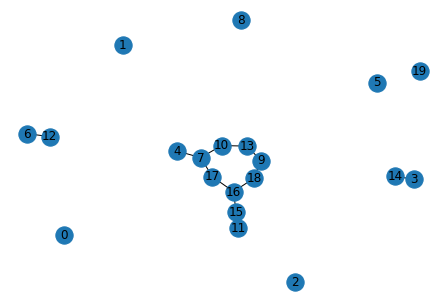

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, 0), (6, 1), (7, 3), (8, 0), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5, 3: 1.8333333333333333, 2: 2.3333333333333335}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.05263157894736842, 5: 0.0, 6: 0.05263157894736842, 7: 0.15789473684210525, 8: 0.0, 9: 0.10526315789473684, 10: 0.10526315789473684, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


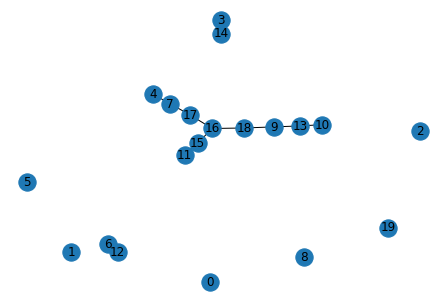

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, 0), (6, 1), (7, 2), (8, 0), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.4285714285714286, 2: 2.0, 3: 2.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.05263157894736842, 5: 0.0, 6: 0.05263157894736842, 7: 0.10526315789473684, 8: 0.0, 9: 0.10526315789473684, 10: 0.05263157894736842, 11: 0.05263157894736842, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.10526315789473684, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


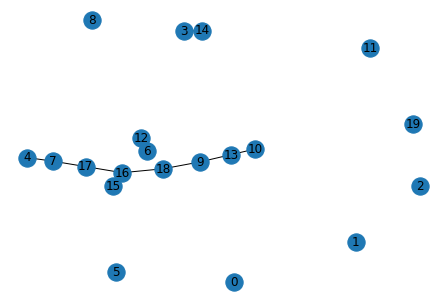

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, 0), (6, 1), (7, 2), (8, 0), (9, 2), (10, 1), (11, 0), (12, 1), (13, 2), (14, 1), (15, 1), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5714285714285714, 2: 2.0, 3: 1.6666666666666667}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.05263157894736842, 5: 0.0, 6: 0.05263157894736842, 7: 0.10526315789473684, 8: 0.0, 9: 0.10526315789473684, 10: 0.05263157894736842, 11: 0.0, 12: 0.05263157894736842, 13: 0.10526315789473684, 14: 0.05263157894736842, 15: 0.05263157894736842, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


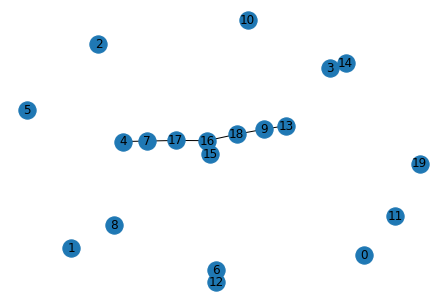

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 1), (5, 0), (6, 1), (7, 2), (8, 0), (9, 2), (10, 0), (11, 0), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5714285714285714, 2: 2.0, 3: 1.6666666666666667}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.05263157894736842, 5: 0.0, 6: 0.05263157894736842, 7: 0.10526315789473684, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.05263157894736842, 13: 0.05263157894736842, 14: 0.05263157894736842, 15: 0.05263157894736842, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


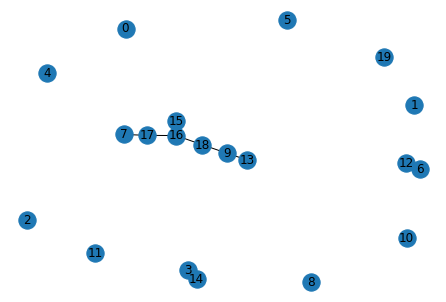

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 0), (5, 0), (6, 1), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 2), (18, 2), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5714285714285714, 2: 2.0, 3: 1.6666666666666667}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.0, 5: 0.0, 6: 0.05263157894736842, 7: 0.05263157894736842, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.05263157894736842, 13: 0.05263157894736842, 14: 0.05263157894736842, 15: 0.05263157894736842, 16: 0.15789473684210525, 17: 0.10526315789473684, 18: 0.10526315789473684, 19: 0.0}


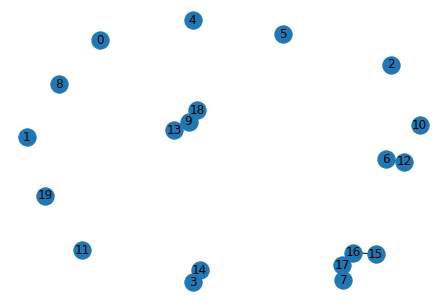

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 0), (5, 0), (6, 1), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5, 2: 1.3333333333333333}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.0, 5: 0.0, 6: 0.05263157894736842, 7: 0.05263157894736842, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.05263157894736842, 13: 0.05263157894736842, 14: 0.05263157894736842, 15: 0.05263157894736842, 16: 0.10526315789473684, 17: 0.10526315789473684, 18: 0.05263157894736842, 19: 0.0}


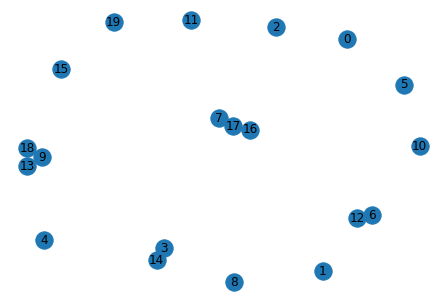

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 1), (4, 0), (5, 0), (6, 1), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 1), (13, 1), (14, 1), (15, 0), (16, 1), (17, 2), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5, 2: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.05263157894736842, 4: 0.0, 5: 0.0, 6: 0.05263157894736842, 7: 0.05263157894736842, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.05263157894736842, 13: 0.05263157894736842, 14: 0.05263157894736842, 15: 0.0, 16: 0.05263157894736842, 17: 0.10526315789473684, 18: 0.05263157894736842, 19: 0.0}


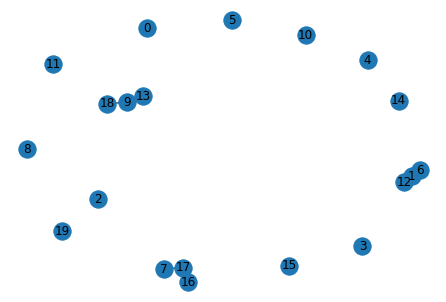

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 1), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 1), (13, 1), (14, 0), (15, 0), (16, 1), (17, 2), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.6666666666666667, 2: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.05263157894736842, 7: 0.05263157894736842, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.05263157894736842, 13: 0.05263157894736842, 14: 0.0, 15: 0.0, 16: 0.05263157894736842, 17: 0.10526315789473684, 18: 0.05263157894736842, 19: 0.0}


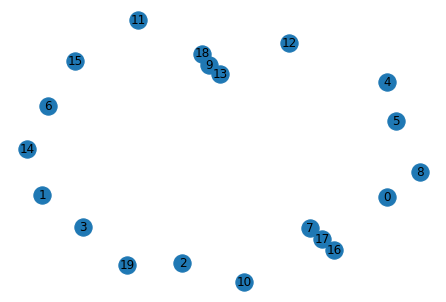

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 1), (8, 0), (9, 2), (10, 0), (11, 0), (12, 0), (13, 1), (14, 0), (15, 0), (16, 1), (17, 2), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 2.0, 2: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.05263157894736842, 8: 0.0, 9: 0.10526315789473684, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.05263157894736842, 14: 0.0, 15: 0.0, 16: 0.05263157894736842, 17: 0.10526315789473684, 18: 0.05263157894736842, 19: 0.0}


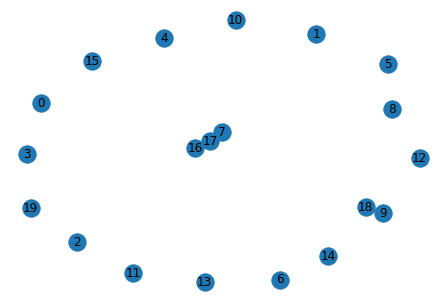

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 1), (8, 0), (9, 1), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 1), (17, 2), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.5, 2: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.05263157894736842, 8: 0.0, 9: 0.05263157894736842, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.05263157894736842, 17: 0.10526315789473684, 18: 0.05263157894736842, 19: 0.0}


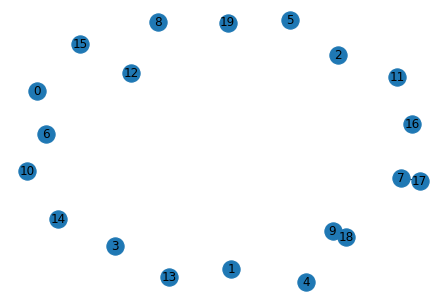

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 1), (8, 0), (9, 1), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 1), (18, 1), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.05263157894736842, 8: 0.0, 9: 0.05263157894736842, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.05263157894736842, 18: 0.05263157894736842, 19: 0.0}


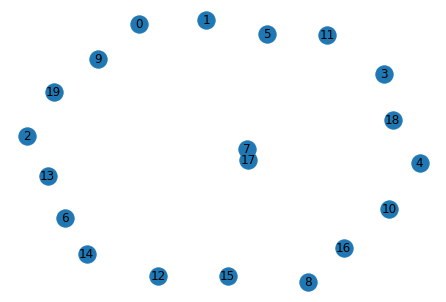

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 1), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 1), (18, 0), (19, 0)]
The average degree of the graph is  {0: 0, 1: 1.0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.05263157894736842, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.05263157894736842, 18: 0.0, 19: 0.0}


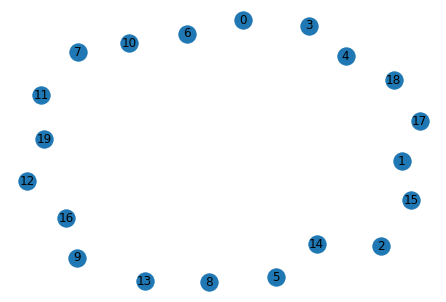

The degree of each node is:  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0)]
The average degree of the graph is  {0: 0}
The degree of centrality: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0}


In [8]:
n = G.number_of_edges()
for i in range(n):
    remove_edge(G)

# Task 2

In [9]:
import pickle
# Open the file for reading
with open('karate_club_coords.pkl', 'rb') as f:
    # Load the object from the file
    my_object = pickle.load(f, encoding='latin1')
# Use the object as needed
print(my_object)

{'24': array([257.87969408, 318.49368742]), '25': array([446.11750059,  73.11363804]), '26': array([490.53962023, 151.34941744]), '27': array([310.9937593 , 316.88400474]), '20': array([231.27467138, 268.3554436 ]), '21': array([446.60109522, 386.22347982]), '22': array([411.12965804,  53.253833  ]), '23': array([500.        , 269.52685069]), '28': array([472.79527229, 110.9020759 ]), '29': array([149.03975494, 446.03988462]), '1': array([ 69.97107594, 159.0111701 ]), '3': array([157.90050621,   4.23543315]), '2': array([ 96.8218241 , 237.14728561]), '5': array([ 22.29884097, 325.62733401]), '4': array([121.2112242, 275.3350923]), '7': array([125.53235717,  25.74222818]), '6': array([152.65129782, 154.80775364]), '9': array([ 61.083021  , 394.28922573]), '8': array([208.45409923, 139.01263619]), '11': array([  4.99817603, 197.83222394]), '10': array([271.622609  , 400.39798242]), '13': array([183.36024879, 250.69609714]), '12': array([ 23.49922324, 146.13161611]), '15': array([351.3978

Node Degree
1 16
2 9
3 10
4 6
5 3
6 4
7 4
8 4
9 5
10 2
11 3
12 1
13 2
14 5
15 2
16 2
17 2
18 2
19 2
20 3
21 2
22 2
23 2
24 5
25 3
26 3
27 2
28 4
29 3
30 4
31 4
32 6
33 12
34 17


<function matplotlib.pyplot.show(close=None, block=None)>

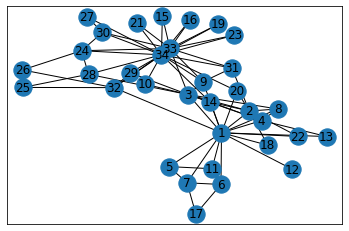

In [10]:
G = nx.karate_club_graph()
G1 = nx.convert_node_labels_to_integers(G, first_label=1)
G1 = nx.relabel_nodes(G1, lambda x: str(x))
print("Node Degree")
for v in G1:
    print('%s %s' % (v,G1.degree(v)))

nx.draw_networkx(G1)
plt.show